<a href="https://colab.research.google.com/github/umesh2908/LSTM-time-series-forecasting-of-AG-load/blob/master/LSTM_Timeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

Saving forecast_data.xlsx to forecast_data.xlsx


In [0]:
import io
df=pd.read_excel(io.BytesIO(uploaded['forecast_data.xlsx']))

In [0]:
df.head()

,REGION_NAME,ZONE_NAME,CIRCLE_NAME,DIVISION_NAME,SUBDIVISION_NAME,FEEDER_BU,SUBSTATION_CODE,FEEDER_CODE,SUBSTATION_NAME,FEEDER_NAME,METER_SR_NO,MF,MAKE_CODE,DAYPROFILE,DAYPROFILE_DATE,INTERVAL,RPH_VOLT,YPH_VOLT,BPH_VOLT,RPH_LCURR,YPH_LCURR,BPH_LCURR,ACTIVE_ENERGY,KW,REACTIVE_ENERGY,APPERENT_ENERGY,ACTIVE_DEMAND,REACTIVE_DEMAND,APPERENT_DEMAND,FILE_SRC
0,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 00:00:00,01-APR-18 12.00.00.000000000 AM,1,6352.94,6470.58,6352.94,1.233,1.277,1.267,10.20,816.0,6.64,12.18,NaN,NaN,NaN,AMR
1,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 00:30:00,01-APR-18 12.30.00.000000000 AM,2,6470.58,6470.58,6352.94,1.293,1.341,1.328,10.76,860.8,7.13,12.91,NaN,NaN,NaN,AMR
2,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 01:00:00,01-APR-18 01.00.00.000000000 AM,3,6470.58,6588.23,6470.58,1.332,1.384,1.369,11.15,892.0,7.48,13.42,NaN,NaN,NaN,AMR
3,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 01:30:00,01-APR-18 01.30.00.000000000 AM,4,6470.58,6588.23,6470.58,1.349,1.396,1.380,11.24,899.2,7.58,13.55,NaN,NaN,NaN,AMR
4,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 02:00:00,01-APR-18 02.00.00.000000000 AM,5,6588.23,6588.23,6470.58,1.378,1.422,1.407,11.49,919.2,7.79,13.89,NaN,NaN,NaN,AMR


In [0]:
df['DAYPROFILE'] = pd.to_datetime(df.DAYPROFILE,format='%d-%m-%Y %H:%M:%S') 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

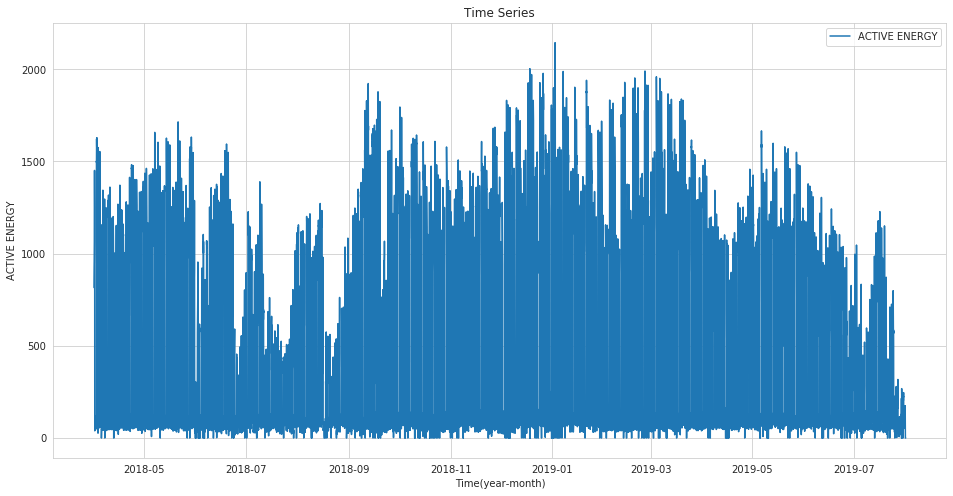

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
df.index = df['DAYPROFILE'] # indexing the Datetime to get the time period on the x-axis. 
ts = df['KW']
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='ACTIVE ENERGY') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("ACTIVE ENERGY") 
plt.legend(loc='best')

In [0]:
train=pd.DataFrame({'Datetime':df['DAYPROFILE'],'ACTIVE_ENERGY':df['KW']})

In [0]:
train.isnull().sum()

Datetime         0
ACTIVE_ENERGY    0
dtype: int64

In [0]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


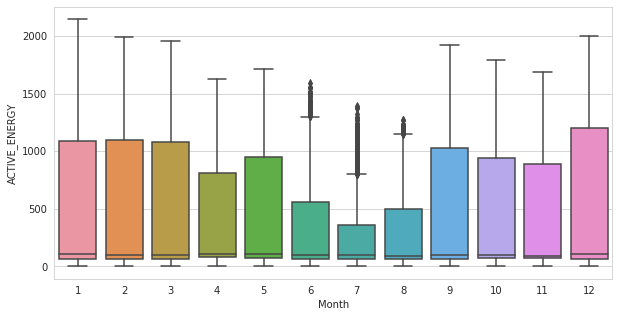

In [0]:
plt.figure(figsize=(10,5))
train['Year'] = train.index.year
train['Month'] = train.index.month
sns.boxplot(data=train,x='Month',y='ACTIVE_ENERGY')

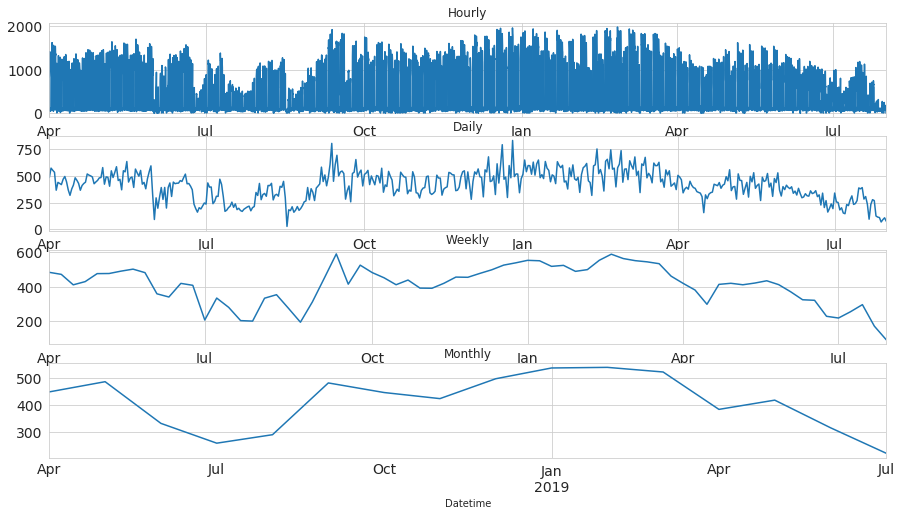

In [0]:
fig, axs = plt.subplots(4,1) 
hourly.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

In [0]:
train.shape

(23376, 2)

In [0]:
Train=train.ix['01-04-2018':'30-06-2019'] 
valid=train.ix['07-01-2019':'07-31-2019']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [0]:
Train.shape,valid.shape

((21888, 2), (1488, 2))

In [0]:
Train

,Datetime,ACTIVE_ENERGY
Datetime,,
2018-04-01 00:00:00.000,2018-04-01 00:00:00.000,816.0
2018-04-01 00:30:00.000,2018-04-01 00:30:00.000,860.8
2018-04-01 01:00:00.000,2018-04-01 01:00:00.000,892.0
2018-04-01 01:30:00.000,2018-04-01 01:30:00.000,899.2
2018-04-01 02:00:00.000,2018-04-01 02:00:00.000,919.2
...,...,...
2019-06-30 21:30:00.001,2019-06-30 21:30:00.001,94.4
2019-06-30 22:00:00.001,2019-06-30 22:00:00.001,93.6
2019-06-30 22:30:00.001,2019-06-30 22:30:00.001,94.4


In [0]:
train_hourly = Train.resample('H').mean() 
Valid_hourly=valid.resample('H').mean()

In [0]:
train_hourly

,ACTIVE_ENERGY
Datetime,
2018-04-01 00:00:00,838.4
2018-04-01 01:00:00,895.6
2018-04-01 02:00:00,921.2
2018-04-01 03:00:00,941.2
2018-04-01 04:00:00,984.4
...,...
2019-06-30 19:00:00,95.6
2019-06-30 20:00:00,100.4
2019-06-30 21:00:00,94.4


In [0]:
Valid_hourly

,ACTIVE_ENERGY
Datetime,
2019-07-01 00:00:00,87.6
2019-07-01 01:00:00,86.4
2019-07-01 02:00:00,88.4
2019-07-01 03:00:00,94.8
2019-07-01 04:00:00,113.6
...,...
2019-07-31 19:00:00,0.0
2019-07-31 20:00:00,0.0
2019-07-31 21:00:00,0.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

training_scaled = scaler.fit_transform(train_hourly)

In [0]:
training_scaled

array([[0.42292171],
       [0.45177563],
       [0.46468927],
       ...,
       [0.04761905],
       [0.04741727],
       [0.04539952]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
features_set = []
labels = []
for i in range(48, 10944):
    features_set.append(training_scaled[i-48:i, 0])
    labels.append(training_scaled[i, 0])


In [0]:
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history=model.fit(features_set, labels, epochs = 30, batch_size = 32,validation_split=0.1,  shuffle=False)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 9806 samples, validate on 1090 samples
Epoch 1/30





9806/9806 [==============================] - 54s 5ms/step - loss: 0.0514 - val_loss: 0.0266
Epoch 2/30
9806/9806 [==============================] - 51s 5ms/step - loss: 0.0322 - val_loss: 0.0229
Epoch 3/30
9806/9806 [==============================] - 51s 5ms/step - loss: 0.0274 - val_loss: 0.0186
Epoch 4/30
9806/9806 [==============================] - 51s 5ms/step - loss: 0.0210 - val_loss: 0.0132
Epoch 5/30
9806/9806 [==============================] - 52s 5ms/step - loss: 0.0177 - val_loss: 0.0117
Epoch 6/30
9806/9806 [==============================] - 51s 5ms/step - loss: 0.0166 - val_loss: 0.0117
Epoch 7/30
9806/9806 [==============================] - 51s 5ms/step - loss: 0.0158 - val_loss: 0.0115
Epoch 8/3

In [0]:
#from keras.preprocessing.sequence import TimeseriesGenerator
#n_input=48
#n_features=1
#generator=TimeseriesGenerator(training_scaled,training_scaled,length=n_input,batch_size=16)
#model=Sequential()
#model.add(LSTM(50,input_shape=(n_input,n_features))
#model.add(Dropout(0.2))
#model.add(Dense(1))
#model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#history=model.fit_generator(generator, epochs = 30 )

SyntaxError: ignored

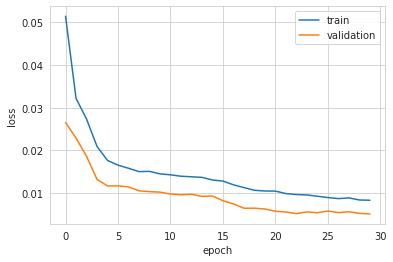

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()




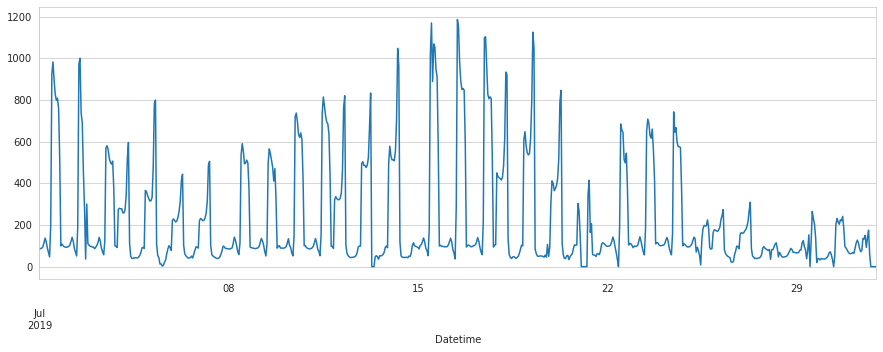

In [0]:
Valid_hourly['ACTIVE_ENERGY'].plot(figsize=(15,5)) 

In [0]:
total = pd.concat((train_hourly['ACTIVE_ENERGY'], Valid_hourly['ACTIVE_ENERGY']), axis=0)

In [0]:
total.head()

Datetime
2018-04-01 00:00:00    838.4
2018-04-01 01:00:00    895.6
2018-04-01 02:00:00    921.2
2018-04-01 03:00:00    941.2
2018-04-01 04:00:00    984.4
Freq: H, Name: ACTIVE_ENERGY, dtype: float64

In [0]:
test_inputs = total[len(total) - len(Valid_hourly) - 48:].values

In [0]:
test_inputs.shape

(792,)

In [0]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.fit_transform(test_inputs)

In [0]:
test_features = []
for i in range(48, 792):
    test_features.append(test_inputs[i-48:i, 0])

In [0]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [0]:
predictions = model.predict(test_features)

In [0]:
predictions = scaler.inverse_transform(predictions)

In [0]:
predictions.shape,Valid_hourly.shape

((744, 1), (744, 1))

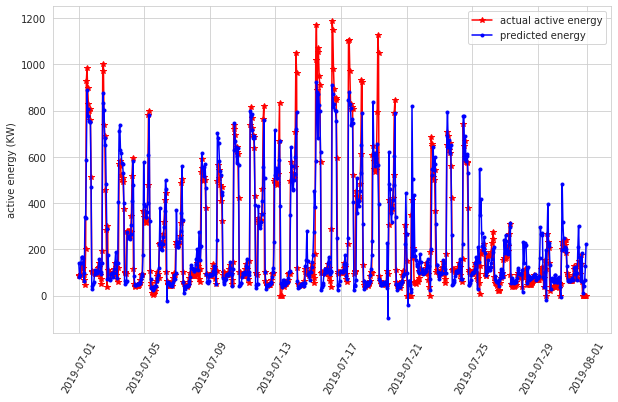

In [0]:
plt.figure(figsize=(10,6))
plt.plot(Valid_hourly.index,Valid_hourly['ACTIVE_ENERGY'],color='red',marker='*',label='actual active energy')
plt.plot(Valid_hourly.index,predictions, color='blue',marker='.', label='predicted energy ')
plt.ylabel('active energy (KW)')
plt.xticks(rotation=60)
plt.legend()
plt.show()


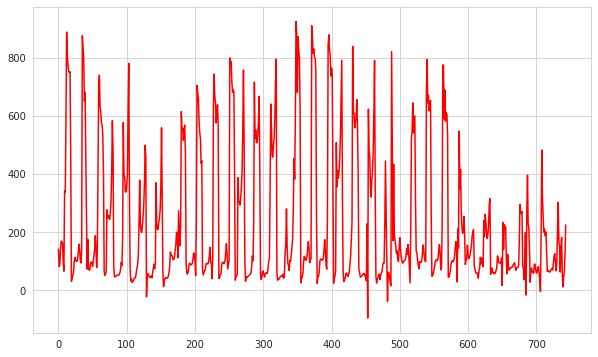

In [0]:
plt.figure(figsize=(10,6))
plt.plot(predictions , color='red', label='Predicted active energy')

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Valid_hourly['ACTIVE_ENERGY'],predictions)

10513.582705816163

In [0]:
Valid_hourly['ACTIVE_ENERGY']

Datetime
2019-07-01 00:00:00     87.6
2019-07-01 01:00:00     86.4
2019-07-01 02:00:00     88.4
2019-07-01 03:00:00     94.8
2019-07-01 04:00:00    113.6
                       ...  
2019-07-31 19:00:00      0.0
2019-07-31 20:00:00      0.0
2019-07-31 21:00:00      0.0
2019-07-31 22:00:00      0.0
2019-07-31 23:00:00      0.0
Freq: H, Name: ACTIVE_ENERGY, Length: 744, dtype: float64

In [0]:
predictions[0:10]

array([[141.27266],
       [ 81.85111],
       [ 87.45729],
       [142.4443 ],
       [168.26564],
       [167.71048],
       [161.32169],
       [ 97.48294],
       [ 65.15266],
       [341.47897]], dtype=float32)

In [0]:
from sklearn.metrics import r2_score
r2_score(Valid_hourly['ACTIVE_ENERGY'],predictions)

0.8331483829641927

In [0]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(Valid_hourly['ACTIVE_ENERGY'], predictions)
print('Mean absolute percentage error:', MAE/100)

Mean absolute percentage error: 0.5872669089635213


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 48, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 48, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               